<a href="https://colab.research.google.com/github/badgujjarajay/fruits-classification/blob/master/fruits_classification_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [3]:
import pandas as pd
import os
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [4]:
!kaggle datasets download -d badgujjarajay/fruits-data

 93% 41.0M/44.1M [00:03<00:00, 9.65MB/s]
100% 44.1M/44.1M [00:03<00:00, 15.1MB/s]


In [5]:
!unzip "*.zip"

Archive:  fruits-data.zip
  inflating: fruits_data/Apple/00000000.jpg  
  inflating: fruits_data/Apple/00000001.jpg  
  inflating: fruits_data/Apple/00000002.jpg  
  inflating: fruits_data/Apple/00000003.jpg  
  inflating: fruits_data/Apple/00000004.jpg  
  inflating: fruits_data/Apple/00000005.jpg  
  inflating: fruits_data/Apple/00000006.jpg  
  inflating: fruits_data/Apple/00000007.jpg  
  inflating: fruits_data/Apple/00000008.jpg  
  inflating: fruits_data/Apple/00000009.jpg  
  inflating: fruits_data/Apple/00000010.jpg  
  inflating: fruits_data/Apple/00000011.jpg  
  inflating: fruits_data/Apple/00000012.jpg  
  inflating: fruits_data/Apple/00000013.jpg  
  inflating: fruits_data/Apple/00000014.jpg  
  inflating: fruits_data/Apple/00000015.jpg  
  inflating: fruits_data/Apple/00000016.jpg  
  inflating: fruits_data/Apple/00000017.jpg  
  inflating: fruits_data/Apple/00000018.jpg  
  inflating: fruits_data/Apple/00000019.jpg  
  inflating: fruits_data/Apple/00000020.jpg  
  inflat

In [6]:
np.random.seed(1)

In [7]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("/content/fruits_data"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms()).normalize(imagenet_stats)

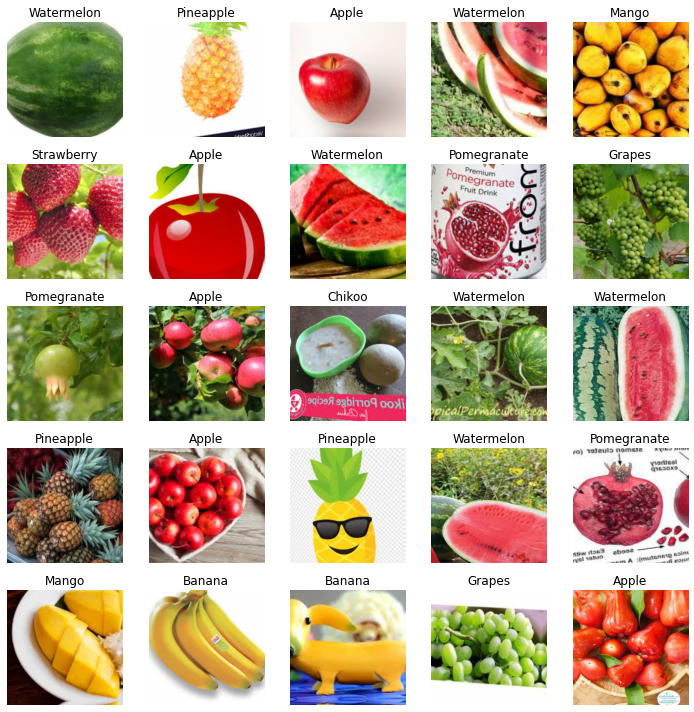

In [8]:
data.show_batch(rows=5,figsize=(10,10))

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [10]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,1.366107,0.718188,0.815895,00:54
1,0.910977,0.624991,0.821932,00:53
2,0.674134,0.522612,0.851107,00:52
3,0.503899,0.482084,0.858149,00:53
4,0.388837,0.451546,0.860161,00:53
5,0.306253,0.449396,0.858149,00:53


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [12]:
os.makedirs("/content/drive/My Drive/fruits-classification",exist_ok=True)
dir = "/content/drive/My Drive/fruits-classification"

In [13]:
learn.save(dir+"/Stage-1")

In [14]:
learn.load(dir + "/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (3977 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Apple,Apple,Apple,Apple,Apple
Path: /content/fruits_data;

Valid: LabelList (994 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Guava,Banana,Banana,Watermelon,Watermelon
Path: /content/fruits_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=T

In [15]:
learn.export(dir+"/export.pkl")

In [16]:
!pip install -U kora
from kora.drive import upload_public
url = upload_public(dir+"/export.pkl")
url

'https://drive.google.com/uc?id=18E0SFg-JcB-GfsZnq_a5DBG0ormdyhL1'